# Demo: CSV-Datei mit Bevölkerungsdaten laden, filtern und plotten

Verwendet **pandas** und **matplotlib**

In [2]:
import pandas as pd
df = pd.read_csv('data/population_total.csv')
'Data Frame geladen als df'

'Data Frame geladen als df'

In [3]:
# Zeige Standard-Statistik des Data Frames
df.describe()

,year,population
count,4178.000000,4.178000e+03
mean,1993.956438,2.453288e+07
std,21.685998,1.069473e+08
min,1955.000000,6.440000e+02
25%,1975.000000,2.855815e+05
50%,1995.000000,3.742758e+06
75%,2016.000000,1.325239e+07
max,2020.000000,1.439324e+09


In [5]:
# Zeige die ersten 5 Zeilen
df.head()

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09


In [7]:
df_germany = df.query(
    'country=="Germany"', 
    engine="python"
    )
df_germany['population'].describe()    

count    1.800000e+01
mean     7.976151e+07
std      3.417107e+06
min      7.153746e+07
25%      7.835692e+07
50%      8.098283e+07
75%      8.209218e+07
max      8.378394e+07
Name: population, dtype: float64

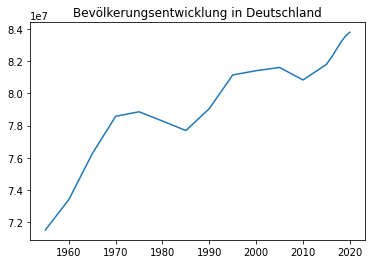

<Axes: title={'center': 'Bevölkerungsentwicklung in Deutschland'}>

In [8]:
df_germany.plot(
    x='year', 
    y='population', 
    kind='line', 
    xlabel='', 
    ylabel='', 
    title='Bevölkerungsentwicklung in Deutschland', 
    legend=False
    )

In [9]:
import matplotlib.pyplot as plt
'matplotlib.pyplot geladen und referenziert als plt'

'matplotlib.pyplot geladen und referenziert als plt'

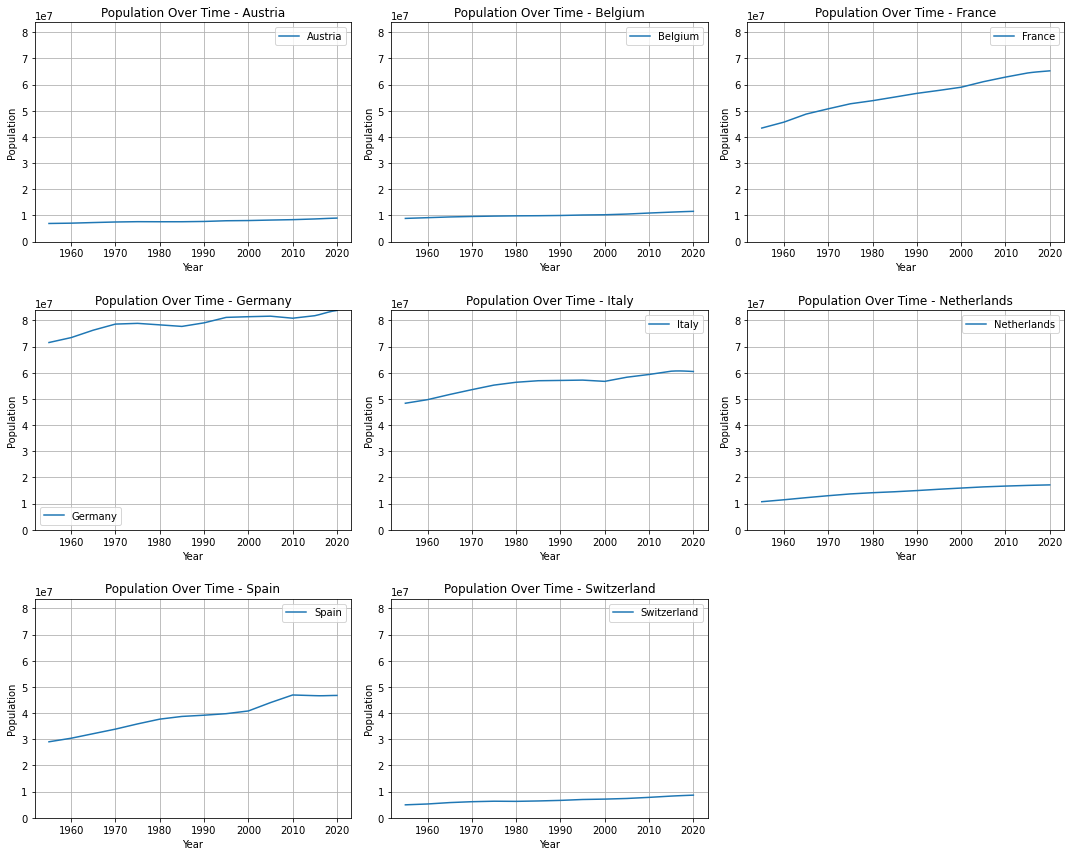

In [10]:
# Nur eine Auswahl Länder ausgeben
countries_to_filter = ['Austria','France','Italy','Spain','Germany','Switzerland','Netherlands','Belgium']
# Data Frame filtern
filtered = df[df['country'].isin(countries_to_filter)]
# Nach Ländern gruppieren
grouped = filtered.groupby('country')
# Achsenskalierung vorbereiten
global_min_population = 0 
global_max_population = filtered['population'].max()
# Anzahl Spalten in Diagramm-Layout vorgeben
num_cols = 3
# Anzahl Zeilen aus Länge des Data Frames berechnen
num_rows = (len(grouped) + num_cols -1 ) // num_cols
# Layout der Subplots definieren
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,12))
# Damit in der nachfolgenden Schleife axes als eindimensionales Array behandelt werden kann
if num_rows > 1:
    axes = axes.flatten()
# Einzelne Grafiken erstellen
for i, (country, group) in enumerate(grouped):
    ax = axes[i]
    ax.plot(group['year'], group['population'], label=country)
    ax.set_xlabel('Year')
    ax.set_ylabel('Population')
    ax.set_title(f'Population Over Time - {country}')
    ax.legend()
    ax.grid(True)
    ax.set_ylim(global_min_population, global_max_population)
# Leere Grid-Positionen löschen
for i in range(len(grouped), num_rows * num_cols):
    fig.delaxes(axes[i])
# Grafiken ausgeben
plt.tight_layout()
plt.show()